In [170]:
import torch
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

SEED = 46
np.random.seed(SEED)
torch.manual_seed(SEED)

lista = [[1,2,3],[4,5,6],[7,8,9]]

tensor = torch.Tensor(lista)
tensor = torch.IntTensor(lista)
tensor = torch.LongTensor(lista)
tensor = torch.FloatTensor(lista)
tensor = torch.DoubleTensor(lista)
print(tensor)


tensor([[1., 2., 3.],
        [4., 5., 6.],
        [7., 8., 9.]], dtype=torch.float64)


## Tensores inicializados no PyTorch

- torch.ones: cria um tensor com todos os elementos iguais a 1
- torch.zeros: cria um tensor com todos os elementos iguais a 0
- torch.rand: cria um tensor com elementos aleatórios entre 0 e 1

In [171]:
ts_ones = torch.ones(2,2)
ts_zeros = torch.zeros(2,2)
ts_rand = torch.rand(2,2)
ts_randn = torch.randn(2,2)

print(ts_ones)
print(ts_zeros)
print(ts_rand)
print(ts_randn)


tensor([[1., 1.],
        [1., 1.]])
tensor([[0., 0.],
        [0., 0.]])
tensor([[0.6611, 0.0600],
        [0.5174, 0.1596]])
tensor([[1.2055, 0.3115],
        [0.4642, 1.0123]])


## Conversão de tensores para numpy arrays

In [172]:
np_array = np.array([[1,2,3],[4,5,6],[7,8,9]])
ts_from_np = torch.from_numpy(np_array)
print(ts_from_np)


tensor([[1, 2, 3],
        [4, 5, 6],
        [7, 8, 9]])


In [173]:
if torch.cuda.is_available():
    print("cuda is available")
    device = torch.device("cuda")
else:
    print("cuda is not available")
    device = torch.device("cpu")

cuda is not available


0.0
4.0
-1.0


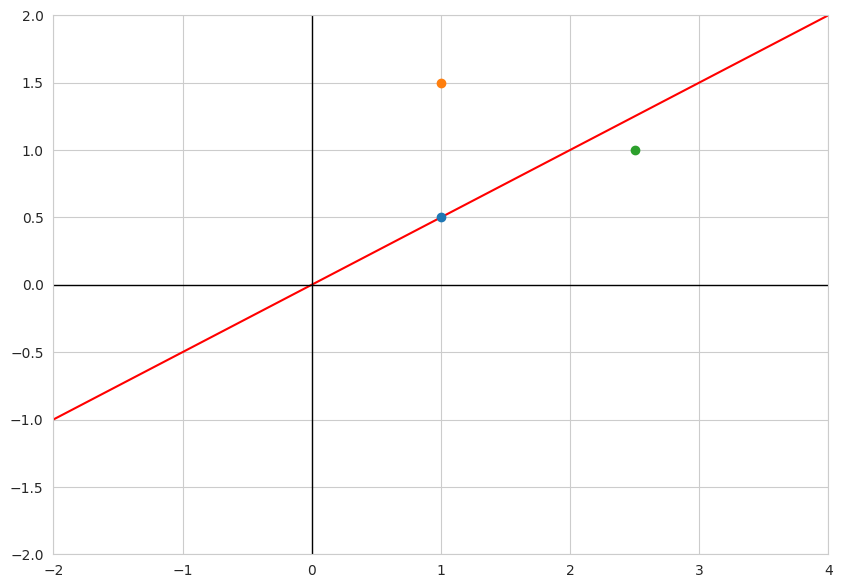

In [174]:
# ax + by + c = 0

def plot_line(a, b, c):

    x = np.linspace(-2, 4, 50)
    y = (-a*x - c) / b

    fig, eixo = plt.subplots(figsize=(10,7))
    eixo.grid(True)  # Adicionar o grid

    sns.set_style("whitegrid")
    sns.lineplot(x=x, y=y, color="red")

    eixo.axhline( color='black', linewidth=1)  # Eixo horizontal
    eixo.axvline(color='black', linewidth=1)  # Eixo vertical

    # Ajustar os limites dos eixos
    eixo.set_xlim(-2, 4)
    eixo.set_ylim(-2, 2)
    return eixo


a, b, c = (-2, 4, 0)
eixo = plot_line(a, b, c)

P1 = (1, 0.5)
P2 = (1, 1.5)
P3 = (2.5, 1)

eixo.plot(P1[0], P1[1], 'o')
eixo.plot(P2[0], P2[1], 'o')
eixo.plot(P3[0], P3[1], 'o')

ret_3 = a * P3[0] + b * P3[1] + c
ret_1 = a * P1[0] + b * P1[1] + c
ret_2 = a * P2[0] + b * P2[1] + c

print(ret_1)
print(ret_2)
print(ret_3)


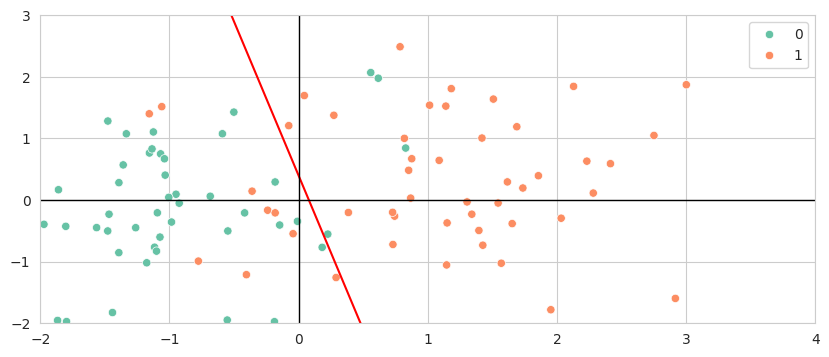

In [175]:
# import make classification

from sklearn.datasets import make_classification

A, B, C = (5, 1, -0.4)

def plot_model(a, b, c):
    X, Y = make_classification(n_samples=100, n_features=2, n_redundant=0, n_informative=1, n_clusters_per_class=1, random_state=46)
    fig, eixo = plt.subplots(figsize=(10,4))
    x_reta = np.linspace(-2, 4, 50)
    y_reta = (-a*x_reta - c) / b
    sns.scatterplot(x=X[:,0], y=X[:,1], hue=Y, palette="Set2", ax=eixo)
    sns.lineplot(x=x_reta, y=y_reta, color="red", ax=eixo)
    eixo.axhline( color='black', linewidth=1)
    eixo.axvline(color='black', linewidth=1)
    eixo.set_xlim(-2, 4)
    eixo.set_ylim(-2, 3)

plot_model(a=A, b=B, c=C)

In [176]:

def classify(ponto, w1, w2, b):
    ret = w1 * ponto[0] + w2 * ponto[1] + b
    if ret > 0:
        return 1, 'laranja'
    else:
        return 0, 'verdim'

Ponto = (1, 0.5)

classe, cor = classify(Ponto, a, b, c)

print(f"O ponto {Ponto} é da classe {classe} e é da cor {cor}")




O ponto (1, 0.5) é da classe 0 e é da cor verdim


In [177]:
acertos = 0

for k in range(len(X)):
    categ, _ = classify(X[k], a, b, c)
    if categ == y[k]:
        acertos += 1

print(f"O modelo acertou {acertos} de {len(X)}")

O modelo acertou 34 de 100


## Perceptron Pytorch

In [178]:
from torch import nn

# w1*x1 + w2*x2 + w3*x3 + b = 0
perceptron = nn.Linear(3, 1)
print(f"Dados Perceptron: {perceptron}")

for nome, tensor in perceptron.named_parameters():
    print(nome, tensor.data)
    
print(f"Peso dos tensores: {perceptron.weight.data}")
print(f"Vies: {perceptron.bias.data}")


Dados Perceptron: Linear(in_features=3, out_features=1, bias=True)
weight tensor([[ 0.5468, -0.1030,  0.4180]])
bias tensor([0.4387])
Peso dos tensores: tensor([[ 0.5468, -0.1030,  0.4180]])
Vies: tensor([0.4387])


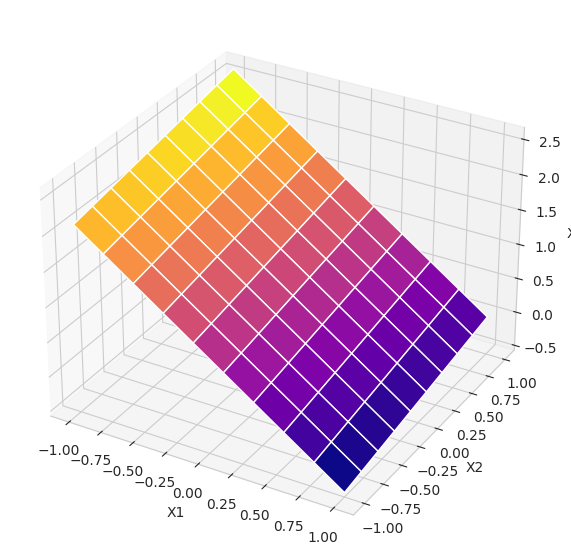

In [179]:
from mpl_toolkits.mplot3d import Axes3D

def plot_3d(perceptron):
    w1, w2, w3 = perceptron.weight.data.numpy()[0]
    b = perceptron.bias.data.numpy()[0]

    X1 = np.linspace(-1, 1, 10)
    X2 = np.linspace(-1, 1, 10)
    X1, X2 = np.meshgrid(X1, X2)
    X3 = (b -w1*X1 - w2*X2) / w3

    fig = plt.figure(figsize=(13,7))
    eixo = fig.add_subplot(projection='3d')
    #eixo.view_init(azim=-90)
    eixo.plot_surface(X1, X2, X3, cmap='plasma')
    eixo.set_xlabel('X1')
    eixo.set_ylabel('X2')
    eixo.set_zlabel('X3')

plot_3d(perceptron)

In [180]:
# X = torch.Tensor([0, 1, 5])
# y = perceptron(X)
# print(y)
# plot_3d(perceptron)

## Funções de ativação

Sigmoid: $f(x) = \frac{1}{1 + e^{-x}}$

Tanh: $f(x) = \frac{e^x - e^{-x}}{e^x + e^{-x}}$

ReLU: $f(x) = max(0, x)$

[]

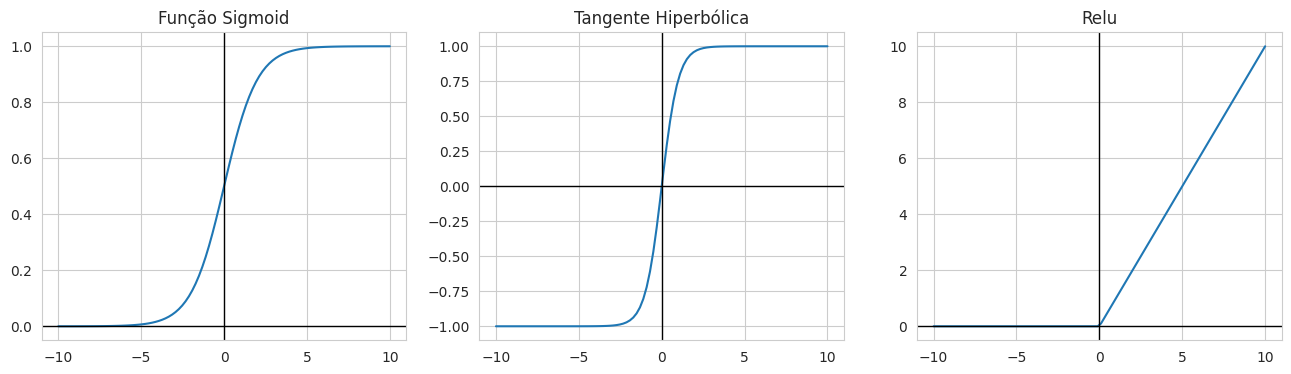

In [181]:
eixo_x = np.linspace(-10, 10, 100)
sigmoid_y = 1 / (1 + np.exp(-eixo_x))
tang_hip = (np.exp(eixo_x) - np.exp(-eixo_x)) / (np.exp(eixo_x) + np.exp(-eixo_x))
relU = np.maximum(0, eixo_x)

fig, eixo = plt.subplots(1, 3, figsize=(16,4))
sns.lineplot(x=eixo_x, y=sigmoid_y, ax=eixo[0])
eixo[0].axhline(color='black', linewidth=1)  # Eixo horizontal
eixo[0].axvline(color='black', linewidth=1)  # Eixo vertical
eixo[0].set_title("Função Sigmoid")


sns.lineplot(x=eixo_x, y=tang_hip, ax=eixo[1])
eixo[1].axhline(color='black', linewidth=1)  # Eixo horizontal
eixo[1].axvline(color='black', linewidth=1)  # Eixo vertical
eixo[1].set_title("Tangente Hiperbólica")

sns.lineplot(x=eixo_x, y=relU, ax=eixo[2])
eixo[2].axhline(color='black', linewidth=1)  # Eixo horizontal
eixo[2].axvline(color='black', linewidth=1)  # Eixo vertical
eixo[2].set_title("Relu")


plt.plot()

In [182]:
perceptron = nn.Linear(2, 1)
sigmoid = nn.Sigmoid()

print(perceptron.weight.data)
print(perceptron.bias.data)


tensor([[0.2219, 0.4458]])
tensor([-0.0269])


[]

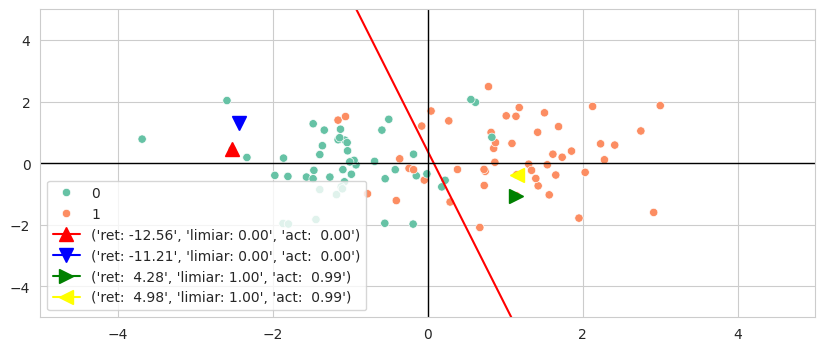

In [195]:



perceptron.weight = torch.nn.Parameter(torch.Tensor([[5, 1]]))
perceptron.bias = torch.nn.Parameter(torch.Tensor([-0.4]))


markers = ['^', 'v', '>', '<']
colors = ['red', 'blue', 'green', 'yellow']


def plot_scatter(a, b, c):
    X, Y = make_classification(n_samples=100, n_features=2, n_redundant=0, n_informative=1, n_clusters_per_class=1, random_state=46)
    x_reta = np.linspace(-2, 4, 50)
    y_reta = (-a*x_reta - c) / b
    fig, eixo = plt.subplots(figsize=(10,4))
    sns.scatterplot(x=X[:,0], y=X[:,1], hue=Y, palette="Set2", ax=eixo)
    sns.lineplot(x=x_reta, y=y_reta, color="red", ax=eixo)
    eixo.axhline( color='black', linewidth=1)
    eixo.axvline(color='black', linewidth=1)
    eixo.set_xlim(-5, 5)
    eixo.set_ylim(-5, 5)
    return X, Y

a, b, c = (5, 1, -0.4)

X, Y = plot_scatter(a, b, c)

for k, idx in enumerate([12, 11, 46, 64]):
    x = torch.Tensor(X[idx])

    ret = perceptron(x)
    act = sigmoid(ret)

    act_limiar = 0 if ret.data < 0 else 1

    label = 'ret: {:5.2f}'.format(ret.data.numpy()[0]), 'limiar: {:4.2f}'.format(act_limiar), 'act: {:5.2f}'.format(act.data.numpy()[0].round(2))
    plt.plot(x[0], x[1], marker=markers[k], color=colors[k], markersize=10, label=label)


plt.legend()
plt.plot()